In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Data Loading and Filtering

In [2]:
df = pd.read_csv('../zuu crew scores.csv')
df = df[df['CourseName']=='Foundations of ML']
del df['MemberName'], df['CourseName']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CapstoneScore
0,3,79.9,43.7,2,0,62.8,5.0,45.3
1,2,76.8,95.6,6,0,87.4,2.7,78.8
2,3,96.6,75.9,8,0,98.4,2.8,65.4
4,2,83.2,24.0,6,0,41.8,4.2,40.1
7,3,86.5,88.0,5,0,23.9,1.3,68.2


In [3]:
Y = df['CapstoneScore'].values
X_df = df.drop(columns=['CapstoneScore'])

# Calculate mean and std for each feature (column)
mean = X_df.mean()
std = X_df.std()

# Standardize each column
X_standardized = (X_df - mean) / std

# Convert to numpy array
X = X_standardized.values

In [4]:
X = np.column_stack((
    np.ones(len(df)),
    X
))

#### Compute Cost

In [5]:
def compute_cost(X,beta,Y):
    y_hat = X.dot(beta) 
    m = len(Y)
    cost = (1 /(2 * m)) * np.sum((y_hat - Y)**2)
    return cost

#### Optimization

In [6]:
cost_history=[]
def gradient_descent(X,Y,beta,n_iter,lr):
    m = len(Y)

    for i in range(n_iter):
        y_hat = X.dot(beta) 
        gradient = (1/m) * X.T.dot(y_hat - Y)
        beta = beta - lr * gradient
        cost  = compute_cost(X,beta,Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"iteration: {i}, beta:{beta}, cost:{cost}")
    
    return beta


#### Checking

In [7]:
beta = np.random.randn(8)
n_iter = 1000
lr = 0.01

In [8]:
beta = gradient_descent(X,Y,beta,n_iter,lr)

iteration: 0, beta:[ 0.24242868 -1.56936448 -0.54916321 -0.93748349  0.67045332  0.44805466
  1.39956605 -1.66532051], cost:1664.191790388327
iteration: 100, beta:[35.0256378  -1.27283364  0.25902339  9.58383184  0.94896409 -0.30369128
  1.50074554  0.64710908], cost:233.6506738236447
iteration: 200, beta:[47.75741727 -0.82980074  0.53903097 13.55060714  0.54001318 -0.16989466
  1.23911399  1.41870961], cost:40.98867187023714
iteration: 300, beta:[ 5.24176603e+01 -5.66671413e-01  6.47641994e-01  1.51156303e+01
  2.05723542e-01  2.79026982e-02  1.07328537e+00  1.62871317e+00], cost:14.670087109801415
iteration: 400, beta:[ 5.41234600e+01 -4.39950347e-01  6.96290760e-01  1.57555141e+01
  6.68268859e-03  1.62591819e-01  1.00003244e+00  1.66264525e+00], cost:11.01585530171369
iteration: 500, beta:[54.74783784 -0.38514255  0.72065467 16.02464971 -0.10161584  0.24094832
  0.97423037  1.65264633], cost:10.496375267929766
iteration: 600, beta:[54.97638032 -0.36345687  0.73352948 16.14050915 -0

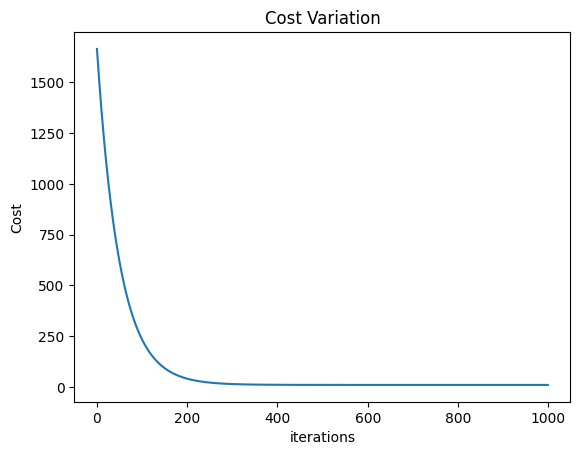

In [9]:
plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

#### Model Evaluation

In [10]:
Y_hat = X.dot(beta) 
Y_hat

array([49.96584166, 79.29430005, 68.47479094, 36.56231703, 71.04636369,
       82.30705163, 38.25250671, 56.23240151, 48.82092295, 45.57394355,
       59.96499832, 36.72135307, 39.5285463 , 49.96185007, 56.82273757,
       30.83628883, 83.7584668 , 28.99752377, 52.47547378, 75.82522714,
       64.95641766, 42.1316695 , 34.64452171, 79.90935438, 79.32804212,
       36.87214399, 44.72305189, 43.12348147, 49.58079525, 38.66836121,
       78.49286573, 39.9552589 , 28.16197744, 61.43911504, 65.93511869,
       68.14020804, 29.39257976, 42.32988238, 32.58571963, 61.16782069,
       62.67418204, 70.35847273, 56.34227318, 70.29147406, 54.57967346,
       57.15563861, 51.88355574, 32.91322413, 59.57687344, 43.65714192,
       77.67728932, 39.46882555, 50.91559381, 76.62003954, 60.55666553,
       78.92203391, 75.19330694, 58.44219861, 70.87741521, 72.63370688,
       26.90501779, 51.79524365, 47.82316873, 79.68360763, 44.56533051,
       56.54936445, 67.41421336, 47.80472267, 82.44195756, 42.93

In [11]:
def MSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(e_i**2)

def MAE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(np.abs(e_i))

def R2_Score(Y,Y_hat):
    y_mean = np.mean(Y)
    e_i = Y - Y_hat
    std_i = Y - y_mean

    E = np.sum(e_i**2) / np.sum(std_i ** 2)
    return 1 - E

In [12]:
mse = MSE(Y, Y_hat)
mae = MAE(Y, Y_hat)
r2 = R2_Score(Y, Y_hat)

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2 Score : {r2}")

MSE : 20.81047697035963
MAE : 3.5390545309212817
R2 Score : 0.927167035475027


In [13]:
lr_model = LinearRegression()
lr_model.fit(X[:, 1:], Y)  # skip the intercept column since sklearn adds it internally

print("Sklearn coefficients:", lr_model.coef_)
print("Sklearn intercept:", lr_model.intercept_)

Sklearn coefficients: [-0.35523215  0.7477395  16.23362197 -0.22249773  0.33544015  0.97752925
  1.61270231]
Sklearn intercept: 55.10833333333334
